In [196]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, silhouette_samples
from sklearn.decomposition import PCA
import umap
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np


In [197]:
data = pd.read_csv('ela_features_with_classes.csv')

In [198]:
data

,Unnamed: 0,function_class,function_id,int,lr2,max,eps_ratio,disp,nbc
0,0,1,1,335.920190,0.718854,7.878710,0.605606,0.776920,-0.474913
1,1,1,1,707.810619,0.837691,8.214469,0.705706,0.803693,-0.457983
2,2,1,1,42.724733,0.804055,8.414653,0.685686,0.789202,-0.475196
3,3,1,1,124.281372,0.784066,8.046171,0.645646,0.795811,-0.479525
4,4,1,1,213.391765,0.692768,6.811131,0.565566,0.777463,-0.505878
...,...,...,...,...,...,...,...,...,...
1195,1195,5,24,697.042360,0.123601,4.934662,0.965966,0.787379,-0.577647
1196,1196,5,24,-193.536965,0.137761,5.472417,1.006006,0.789442,-0.593229
1197,1197,5,24,719.922797,0.135642,5.410031,1.006006,0.814364,-0.589027
1198,1198,5,24,874.140235,0.105563,5.005434,1.006006,0.818904,-0.614149


In [199]:
data = data.drop(columns=['Unnamed: 0', 'function_id'])

In [200]:
data['function_class'].value_counts()

function_class
1    250
3    250
4    250
5    250
2    200
Name: count, dtype: int64

In [201]:
data.isna().sum()

function_class    0
int               0
lr2               0
max               0
eps_ratio         0
disp              0
nbc               0
dtype: int64

In [202]:
X = data[['int', 'lr2', 'max', 'eps_ratio', 'disp', 'nbc']]
y = data['function_class']

In [203]:
scaler = StandardScaler()
#will be used later for clustering
X_scaled = scaler.fit_transform(X)

## Supervised Learning - classification

train test split

In [204]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [205]:
#check data distubution in different columns to identify outliers
# plt.figure(figsize=(20, 10))
# sns.boxplot(data=X)

In [206]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [207]:
# X_train_scaled

In [208]:
# X_test_scaled

In [209]:
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [210]:
def evaluate_model(model, model_name):
    """ Helper function to evaluate the model and store results """
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, preds)
    precision = precision_score(y_test, preds, average='weighted')
    recall = recall_score(y_test, preds, average='weighted')
    f1 = f1_score(y_test, preds, average='weighted')

    return [model_name, accuracy, precision, recall, f1]

Random Forest

In [211]:
rf = RandomForestClassifier()
results_rf = evaluate_model(rf, 'Random Forest')
results_df.loc[0] = results_rf

In [212]:
results_df.loc[0] = results_rf

Support Vector Machine

In [213]:
svm = SVC()
results_svm = evaluate_model(svm, 'Support Vector Machine')

In [214]:
results_df.loc[1] = results_svm

K-Nearest Neighbors

In [215]:
#choose the best number of neighbors
neighbors = range(1, 10)
accuracy = []
for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train_scaled, y_train)
    preds = knn.predict(X_test_scaled)
    accuracy.append(accuracy_score(y_test, preds))

In [216]:
accuracy

[0.9791666666666666,
 0.9708333333333333,
 0.975,
 0.975,
 0.9833333333333333,
 0.9875,
 0.975,
 0.9791666666666666,
 0.975]

In [217]:
knn = KNeighborsClassifier()
results_knn= evaluate_model(knn, 'K-Nearest Neighbors')

In [218]:
results_df.loc[2] = results_knn

Gradient Boosting

In [219]:
gb = GradientBoostingClassifier()
results_gb = evaluate_model(gb, 'Gradient Boosting')

In [220]:
results_df.loc[3] = results_gb

Neural Network (MLP Classifier)

In [221]:
#TODO: MLP does not converge, need to tune hyperparameters

In [222]:
results_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.979167,0.979332,0.979167,0.979165
1,Support Vector Machine,0.808333,0.850146,0.808333,0.796884
2,K-Nearest Neighbors,0.983333,0.983497,0.983333,0.983374
3,Gradient Boosting,0.966667,0.966929,0.966667,0.966398


In [223]:
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_scaled)

/Users/juliakahan/Library/Python/3.9/lib/python/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


For global usage - X_umap

In [224]:
# UMAP Visualization
def visualize_umap(X_umap, y, title):
    """ Function to apply UMAP and plot the 2D embedding """
    # umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
    # X_umap = umap_model.fit_transform(X)

    # Create a DataFrame for visualization
    umap_df = pd.DataFrame(X_umap, columns=['UMAP1', 'UMAP2'])
    umap_df['class'] = y.reset_index(drop=True)

    plt.figure(figsize=(10, 7))
    sns.scatterplot(x='UMAP1', y='UMAP2', hue='class', palette='viridis', data=umap_df, s=100, alpha=0.8)
    plt.title(title)
    plt.show()

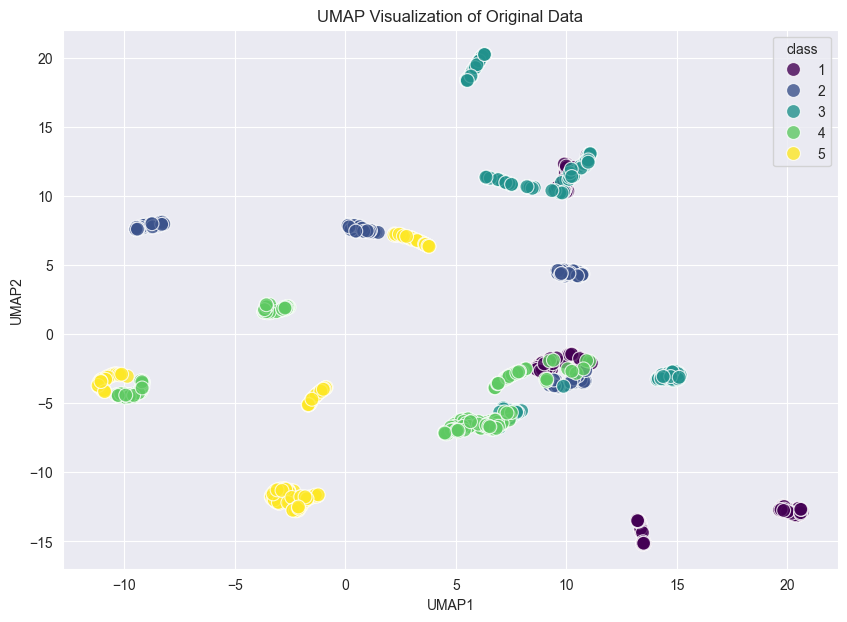

In [225]:
# UMAP visualization for the original data
visualize_umap(X_umap, y, "UMAP Visualization of Original Data")

In [226]:
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_scaled)

/Users/juliakahan/Library/Python/3.9/lib/python/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [230]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_model_predictions(model, X_scaled, X_umap, title):
    """
    Function to visualize the model predictions using UMAP.
    X_umap is the 2D representation of the data after UMAP transformation.
    """
    # Get model predictions
    preds = model.predict(X_scaled)
    unique_preds = np.unique(preds)
    plt.figure(figsize=(10, 7))

    for pred_class in unique_preds:
        # Mask to select only the points of the current predicted class
        mask = preds == pred_class
        plt.scatter(X_umap[mask, 0], X_umap[mask, 1], label=f'Class {pred_class}', alpha=0.7, s=100)

    plt.title(f"{title} - UMAP Visualization of Model Predictions")
    plt.xlabel('UMAP 1')
    plt.ylabel('UMAP 2')

    plt.legend()
    plt.show()


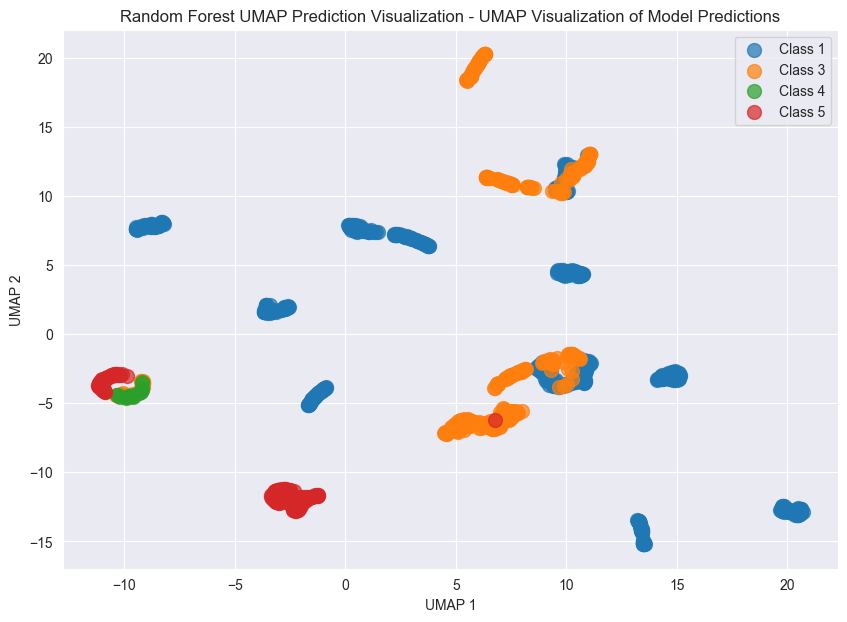

In [231]:
visualize_model_predictions(rf, X_scaled, X_umap, "Random Forest UMAP Prediction Visualization")

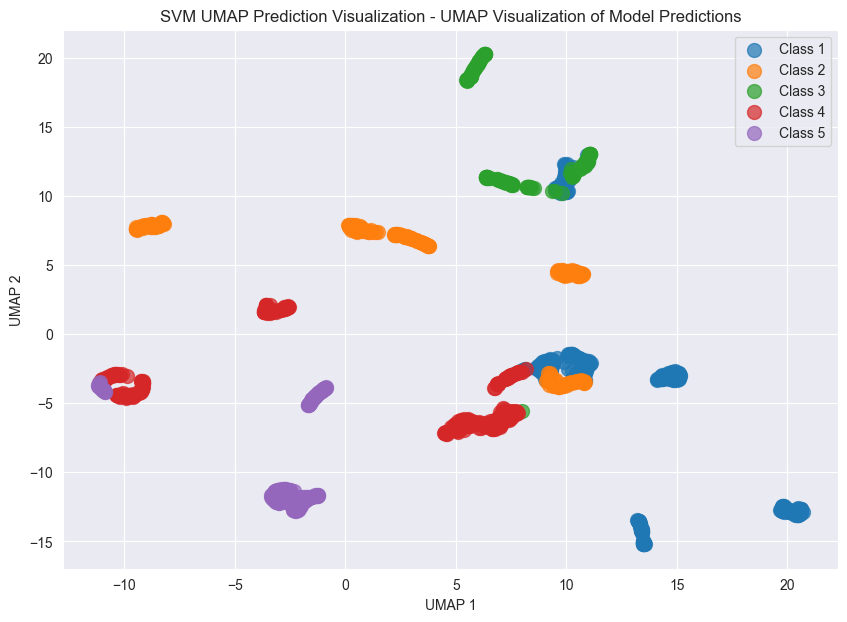

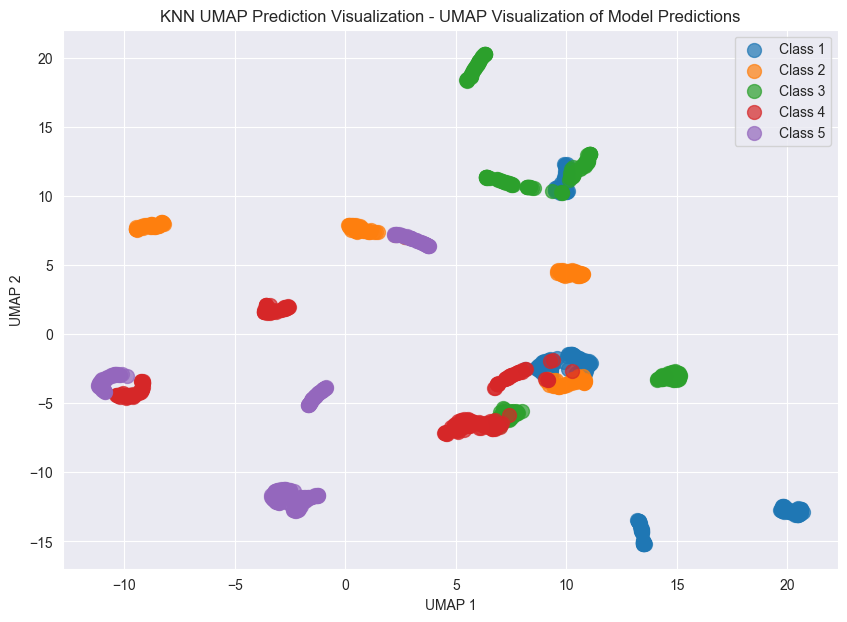

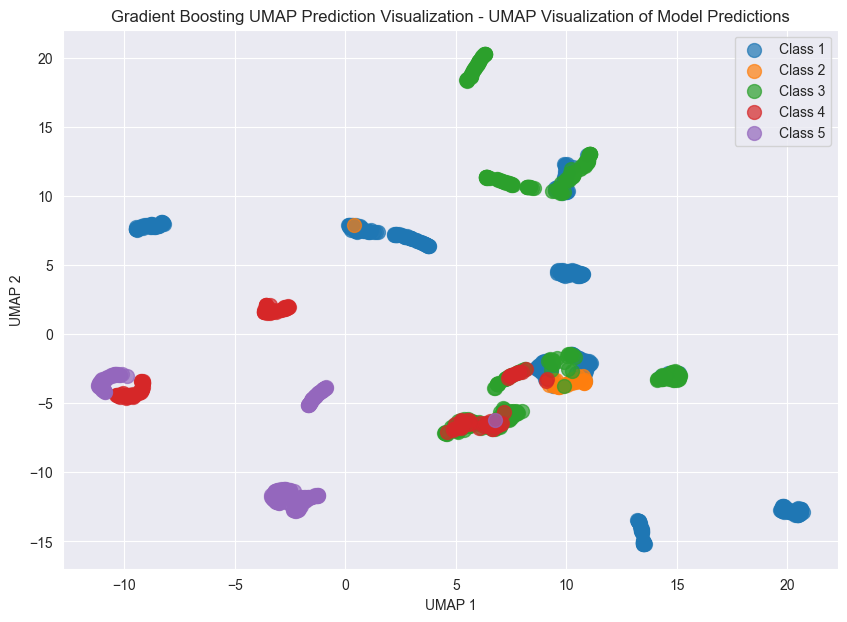

In [232]:
visualize_model_predictions(svm, X_scaled, X_umap, "SVM UMAP Prediction Visualization")
visualize_model_predictions(knn, X_scaled, X_umap, "KNN UMAP Prediction Visualization")
visualize_model_predictions(gb, X_scaled, X_umap, "Gradient Boosting UMAP Prediction Visualization")

## Unsupervised Learning - clustering

In [172]:
def plot_kmeans_silhouette(X, max_clusters=10):
    silhouette_scores = []
    for n_clusters in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        cluster_labels = kmeans.fit_predict(X_scaled)
        silhouette_avg = silhouette_score(X_scaled, cluster_labels)
        silhouette_scores.append(silhouette_avg)

    plt.figure(figsize=(8, 4))
    plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
    plt.title("Silhouette Score for K-Means Clustering")
    plt.xlabel("Number of clusters")
    plt.ylabel("Silhouette Score")
    plt.show()

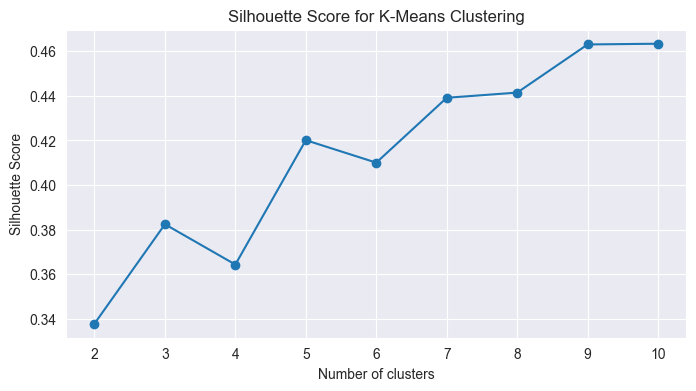

In [173]:
plot_kmeans_silhouette(X_scaled)

In [174]:
clustering_results_df = pd.DataFrame(columns=['Algorithm', 'Silhouette Score', 'Davies-Bouldin Score', 'Calinski-Harabasz Score'])

In [175]:
def evaluate_clustering(algorithm_name, labels, X_scaled):
    if len(set(labels)) > 1:
        silhouette = silhouette_score(X_scaled, labels)
        davies_bouldin = davies_bouldin_score(X_scaled, labels)
        calinski_harabasz = calinski_harabasz_score(X_scaled, labels)
    else:  #for DBSCAN, which can sometimes label everything as noise (-1)
        silhouette = davies_bouldin = calinski_harabasz = "N/A"
    return [algorithm_name, silhouette, davies_bouldin, calinski_harabasz]

In [176]:
def clustering_vis(labels, X_scaled, algorithm):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='rainbow', alpha=0.7)
    plt.title(f"{algorithm} Clustering Visualization (PCA)")
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.show()

In [177]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
evaluate_clustering('K-Means', kmeans_labels, X_scaled)
clustering_results_df.loc[0] = evaluate_clustering('K-Means', kmeans_labels, X_scaled)

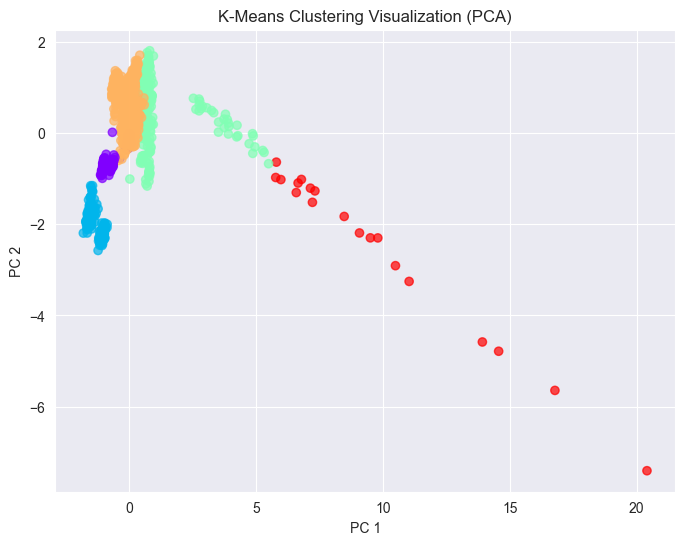

In [178]:
clustering_vis(kmeans_labels, X_scaled, 'K-Means')

In [179]:
agg_clustering = AgglomerativeClustering(n_clusters=5)
agg_labels = agg_clustering.fit_predict(X_scaled)
evaluate_clustering('Agglomerative', agg_labels, X_scaled)
clustering_results_df.loc[1] = evaluate_clustering('Agglomerative', agg_labels, X_scaled)

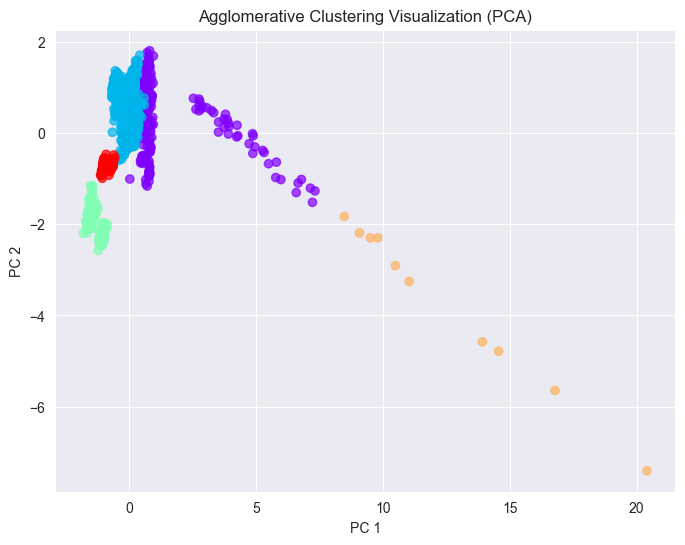

In [180]:
clustering_vis(agg_labels, X_scaled, 'Agglomerative')

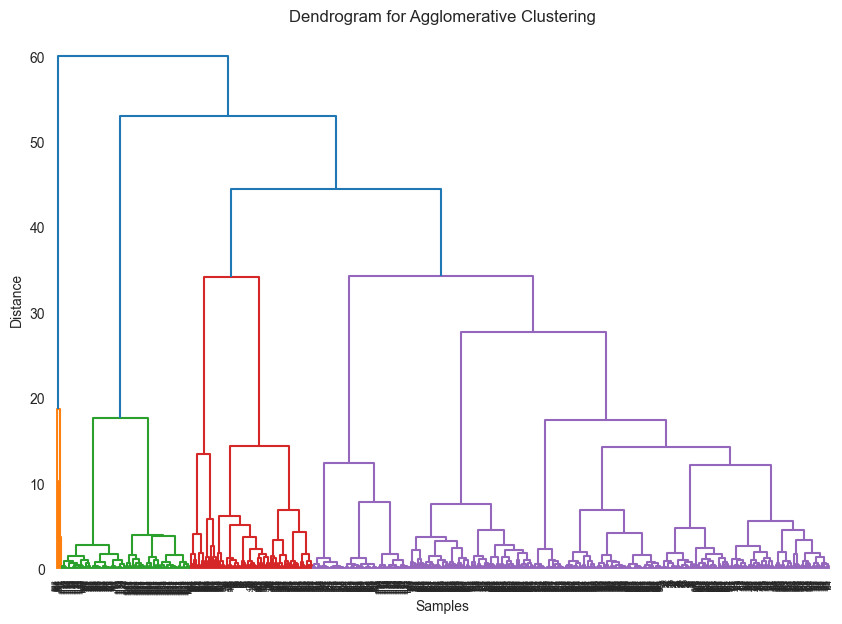

In [181]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(10, 7))
Z = linkage(X_scaled, method='ward')
dendrogram(Z)
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [182]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)
evaluate_clustering('DBSCAN', dbscan_labels, X_scaled)
clustering_results_df.loc[2] = evaluate_clustering('DBSCAN', dbscan_labels, X_scaled)

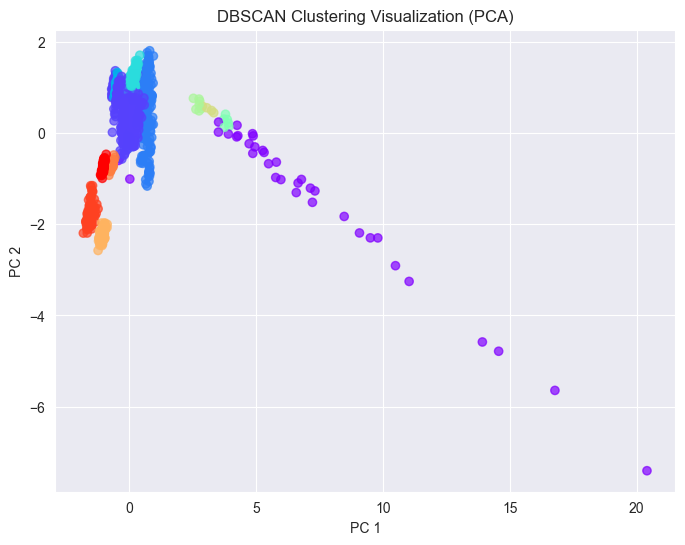

In [183]:
clustering_vis(dbscan_labels, X_scaled, 'DBSCAN')

In [184]:
clustering_results_df = pd.DataFrame(columns=['Algorithm', 'Num_Clusters', 'Silhouette', 'Davies-Bouldin', 'Calinski-Harabasz'])

def evaluate_clustering(algorithm_name, labels, X_scaled, num_clusters):
    """Evaluate clustering using several metrics and return the results as a list."""
    if len(set(labels)) > 1:
        silhouette = silhouette_score(X_scaled, labels)
        davies_bouldin = davies_bouldin_score(X_scaled, labels)
        calinski_harabasz = calinski_harabasz_score(X_scaled, labels)
    else:  # e.g. for DBSCAN when all points are labeled noise
        silhouette = davies_bouldin = calinski_harabasz = "N/A"

    return [algorithm_name, num_clusters, silhouette, davies_bouldin, calinski_harabasz]

cluster_range = range(2, 11)

In [185]:
#KMeans and Agglomerative Clustering
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_labels = kmeans.fit_predict(X_scaled)
    clustering_results_df.loc[len(clustering_results_df)] = evaluate_clustering('K-Means', kmeans_labels, X_scaled, n_clusters)

    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
    agg_labels = agg_clustering.fit_predict(X_scaled)
    clustering_results_df.loc[len(clustering_results_df)] = evaluate_clustering('Agglomerative', agg_labels, X_scaled, n_clusters)

In [186]:
#DBSCAN (Instead of varying clusters, vary the eps parameter)
eps_values = [0.3, 0.5, 0.7, 1.0]
for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    dbscan_labels = dbscan.fit_predict(X_scaled)
    clustering_results_df.loc[len(clustering_results_df)] = evaluate_clustering(f'DBSCAN (eps={eps})', dbscan_labels, X_scaled, 'N/A')

In [187]:
# clustering_results_df

umap for clustering

In [194]:
def clustering_vis_umap(labels, X_umap, algorithm):
    plt.figure(figsize=(10, 7))

    # Get the unique labels in the dataset
    unique_labels = np.unique(labels)

    # Loop through each cluster and plot its points
    for label in unique_labels:
        # Mask to select only the points of the current label
        mask = labels == label
        plt.scatter(X_umap[mask, 0], X_umap[mask, 1],
                    label=f'Cluster {label}', alpha=0.7)

    # Title and axis labels
    plt.title(f"{algorithm} Clustering Visualization (UMAP)")
    plt.xlabel('UMAP 1')
    plt.ylabel('UMAP 2')

    # Add the legend (with automatic placement)
    plt.legend()

    # Show the plot without a colorbar
    plt.show()


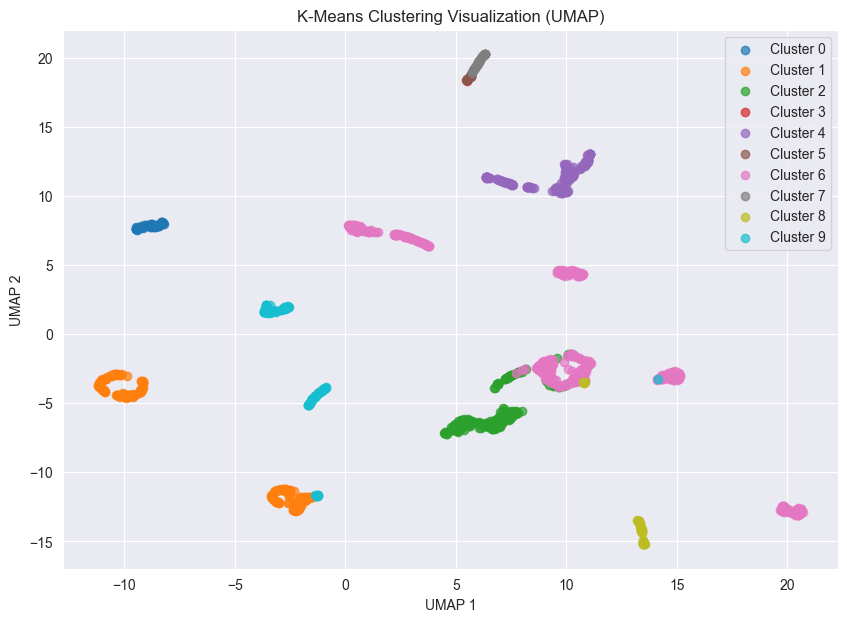

In [195]:
# KMeans clustering
clustering_vis_umap(kmeans_labels, X_umap, 'K-Means')

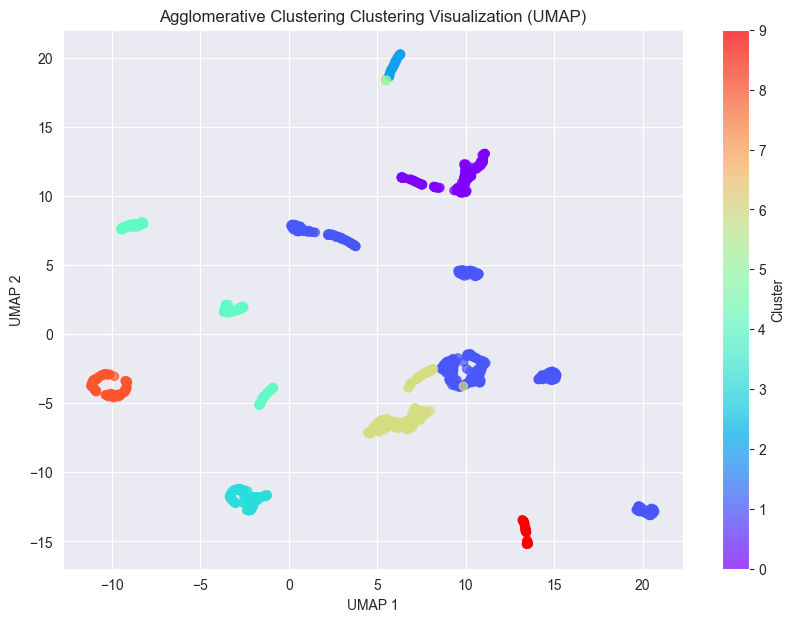

In [190]:
clustering_vis_umap(agg_labels, X_umap, 'Agglomerative Clustering')

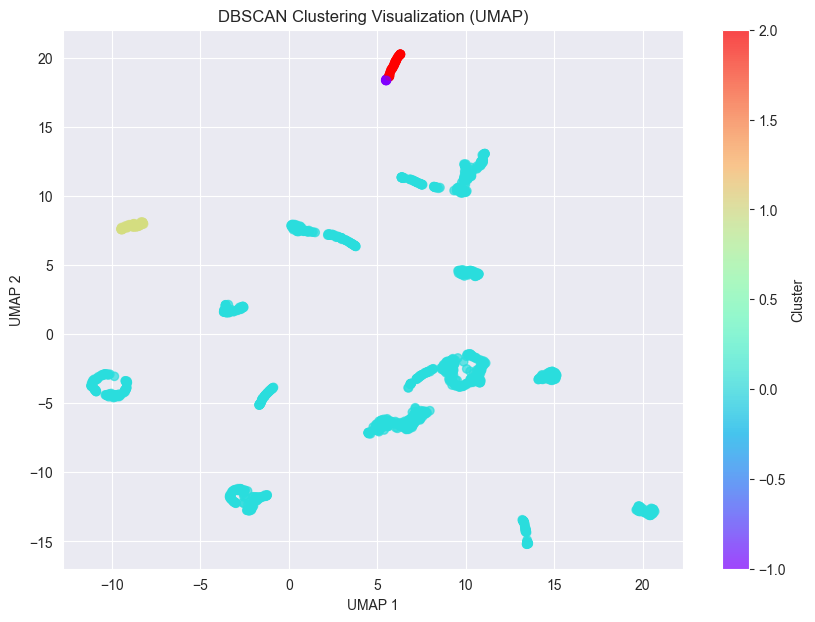

In [191]:
clustering_vis_umap(dbscan_labels, X_umap, 'DBSCAN')